In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from utils import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [9]:
# Initial dimensions of the vectors
print('Number of training images:', X_train.shape)
print('Number of training labels:', y_train.shape)

print('Number of testing images:', X_test.shape)
print('Number of testing labels:', y_test.shape)

Y_train = (y_train.reshape((X_train.shape[0]),1))
Y_test = (y_test.reshape((X_test.shape[0]),1))

X_train = X_train/255 # (Normalizartion)For making the computation faster 
X_test = X_test/255 # (Normalizartion)For making the computation faster

print('Number of training images:', X_train.shape)
print('Number of training labels:', Y_train.shape)

print('Number of testing images:', X_test.shape)
print('Number of testing labels:', Y_test.shape)

Number of training images: (60000, 784)
Number of training labels: (60000,)
Number of testing images: (10000, 784)
Number of testing labels: (10000,)
Number of training images: (60000, 784)
Number of training labels: (60000, 1)
Number of testing images: (10000, 784)
Number of testing labels: (10000, 1)


In [3]:
svclassifier1 = SVC(kernel='linear')
svclassifier1.fit(X_train, y_train)
y_pred1 = svclassifier1.predict(X_test)

In [4]:
y_pred1 = (y_pred1.reshape((X_test.shape[0]),1))
# accuracy
eff = 0
for loop1 in range(0,Y_test.shape[0]):
    if y_pred1[loop1]==Y_test[loop1]:
        eff = eff + 1
print('The accuracy is- ',(eff*100)/Y_test.shape[0])

The accuracy is-  84.64


## Now applying PCA

### This component is just for plotting purpose

In [5]:
pca_mnist = PCA(n_components=2)
X_pca_train = pca_mnist.fit_transform(X_train)
print(X_pca_train.shape)
print(np.sum(pca_mnist.explained_variance_ratio_))

(60000, 2)
0.46794537899527755


In [6]:
principal_mnist_Df = pd.DataFrame(data = X_pca_train
             , columns = ['1', '2'])#,'4', '5', '6', '7', '8', '9', '10'])
principal_mnist_Df['y'] = Y_train

principal_mnist_Df.head()

,1,2,y
0,-0.486250,6.404213,9
1,5.521290,-1.771142,0
2,-2.846709,-4.320934,0
3,0.123132,-3.847324,3
4,3.153409,-4.710466,0


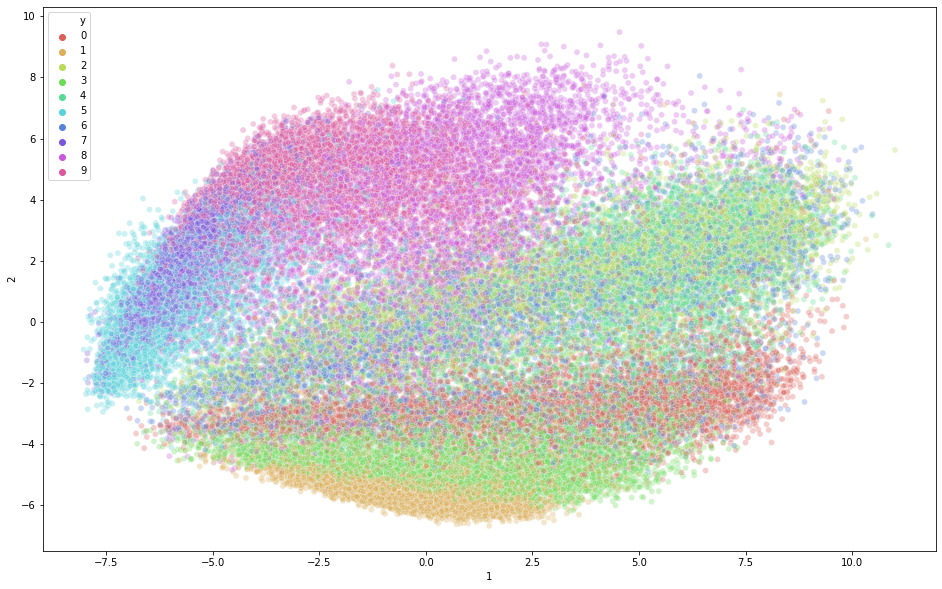

In [7]:
#2d plot of the data after reducing its dimension
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="1", y="2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_mnist_Df,
    legend="full",
    alpha=0.3
)

### Accuracy with PCA component as 2

In [8]:
svclassifier2 = SVC(kernel='linear')
svclassifier2.fit(X_pca_train, y_train)

X_pca_test = pca_mnist.transform(X_test)
y_pred2 = svclassifier2.predict(X_pca_test)

y_pred2 = (y_pred2.reshape((X_test.shape[0]),1))
# accuracy
eff = 0
for loop2 in range(0,Y_test.shape[0]):
    if y_pred2[loop2]==Y_test[loop2]:
        eff = eff + 1
print('The accuracy is- ',(eff*100)/Y_test.shape[0])

The accuracy is-  52.58


## Experimenting with pca value

### Setting PCA component as 100 since it covers 91% of the variance

In [9]:
pca_mnist_2 = PCA(n_components=100)
X_pca_train_2 = pca_mnist_2.fit_transform(X_train)
X_pca_test_2 = pca_mnist_2.transform(X_test)

print(np.sum(pca_mnist_2.explained_variance_ratio_))
print(X_pca_train_2.shape)

0.9118447245815079
(60000, 100)


In [10]:
svclassifier3 = SVC(kernel='linear')
svclassifier3.fit(X_pca_train_2, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred3 = svclassifier3.predict(X_pca_test_2)

y_pred3 = (y_pred3.reshape((X_test.shape[0]),1))
# accuracy
eff = 0
for loop3 in range(0,Y_test.shape[0]):
    if y_pred3[loop3]==Y_test[loop3]:
        eff = eff + 1
print('The accuracy is- ',(eff*100)/Y_test.shape[0])

The accuracy is-  85.01


## Applying kernal SVM

### Applying PCA dimensionality reduction with kernal svm

In [22]:
def cvt_to_pca_svm_kernal_acc(components, kernal, deg, Xtrain, Xtest, Ytrain, Ytest):
    pca = PCA(n_components=components)
    X_tr = pca.fit_transform(Xtrain)
    X_te = pca.transform(Xtest)
    
    print(np.sum(pca.explained_variance_ratio_))
    print(X_tr.shape)  
    
    svclass = SVC(kernel=kernal, degree = deg)
    svclass.fit(X_tr, Ytrain)
    
    y_pd = svclass.predict(X_te)

    y_pd = (y_pd.reshape((Xtest.shape[0]),1))
    # accuracy
    eff = 0
    for lp in range(0,Ytest.shape[0]):
        if y_pd[lp]==Ytest[lp]:
            eff = eff + 1
    print('The accuracy is- ',(eff*100)/Ytest.shape[0])
    return (eff*100)/Ytest.shape[0]

### This is for cross checking with the previous function and inbuilt function

In [13]:
cvt_to_pca_svm_kernal_acc(100, 'linear', 1, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9118465358028237
(60000, 100)
The accuracy is-  85.13


In [14]:
cvt_to_pca_svm_kernal_acc(100, 'poly', 3, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9117830967636242
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  85.27


In [15]:
cvt_to_pca_svm_kernal_acc(100, 'poly', 5, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9118345345335678
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  74.91


### Gaussian/rbf doesn not have any degree but since the function is made considering a degree arguement so a dummy degree has been passed, it does not have any effect in the performance.

In [17]:
cvt_to_pca_svm_kernal_acc(100, 'rbf', 2, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9118447807144475
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  87.6


In [18]:
cvt_to_pca_svm_kernal_acc(100, 'rbf', 3, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9118803737501601
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  87.66


In [19]:
cvt_to_pca_svm_kernal_acc(100, 'rbf', 5, X_train, X_test, Y_train.ravel(), Y_test.ravel())

0.9118293663133438
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  87.61


# Applying LDA on reduced dimension dataset using pca before

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def cvt_to_pca_lda_svm_kernal_acc(components, kernal, deg, Xtrain, Xtest, Ytrain, Ytest):
    pca = PCA(n_components=components)
    lda = LinearDiscriminantAnalysis()
    #X_tr_pca = pca.fit_transform(Xtrain)
    #X_te_pca = pca.transform(Xtest)
    
    X_tr = lda.fit_transform(Xtrain,y_train)
    X_te = lda.transform(Xtest)
    
    print(np.sum(lda.explained_variance_ratio_))
    print(X_tr.shape)  
    
    svclass = SVC(kernel=kernal, degree = deg)
    svclass.fit(X_tr, Ytrain)
    
    y_pd = svclass.predict(X_te)

    y_pd = (y_pd.reshape((Xtest.shape[0]),1))
    # accuracy
    eff = 0
    for lp in range(0,Ytest.shape[0]):
        if y_pd[lp]==Ytest[lp]:
            eff = eff + 1
    print('The accuracy is- ',(eff*100)/Ytest.shape[0])
    return (eff*100)/Ytest.shape[0]

In [21]:
cvt_to_pca_lda_svm_kernal_acc(100, 'linear', 1, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)
The accuracy is-  82.51


In [22]:
cvt_to_pca_lda_svm_kernal_acc(100, 'poly', 3, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  83.37


In [23]:
cvt_to_pca_lda_svm_kernal_acc(100, 'poly', 5, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  81.86


In [24]:
cvt_to_pca_lda_svm_kernal_acc(100, 'rbf', 1, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  83.7


In [25]:
cvt_to_pca_lda_svm_kernal_acc(100, 'rbf', 5, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  83.7


### Applying lda on the data set and not on pca reduced dataset

In [26]:
cvt_to_pca_lda_svm_kernal_acc(100, 'rbf', 5, X_train, X_test, Y_train.ravel(), Y_test.ravel())

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  83.7


# Accuracy pattern based on the parameters:

### pca - 2-150 dimension on normal svm and comparing it with full dimension dataset

### kernal svm - poly - 2 to 8 (full dimension, pca reduced, lda reduced)

### kernal svm - poly - 2 to 8 (full dimension, pca reduced only)


In [10]:
def for_plot1(components, kernal, deg, Xtrain, Xtest, Ytrain, Ytest):
    pca = PCA(n_components=components)
    #lda = LinearDiscriminantAnalysis()
    X_tr_pca = pca.fit_transform(Xtrain)
    X_te_pca = pca.transform(Xtest)
    
    #X_tr = lda.fit_transform(Xtrain,y_train)
    #X_te = lda.transform(Xtest)
    
    #print(np.sum(lda.explained_variance_ratio_))
    #print(X_tr.shape)  
    
    svclass = SVC(kernel=kernal, degree=deg)
    svclass.fit(X_tr_pca, Ytrain)
    
    y_pd = svclass.predict(X_te_pca)

    y_pd = (y_pd.reshape((Xtest.shape[0]),1))
    # accuracy
    eff = 0
    for lp in range(0,Ytest.shape[0]):
        if y_pd[lp]==Ytest[lp]:
            eff = eff + 1
    print('The accuracy is- ',(eff*100)/Ytest.shape[0])
    return (eff*100)/Ytest.shape[0]
    
    

In [11]:
coordinates = []
counter = 0
for comp in range(2, 150, 5):
    val = for_plot1(comp, 'linear', 1, X_train, X_test, Y_train, Y_test)
    coordinates.append([comp,val])


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  52.59


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  73.72


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  78.76


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  80.87


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  82.04


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  82.69


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  82.88


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  83.2


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  83.21


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  83.59


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  83.81


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  83.83


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.21


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.48


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.74


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.66


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.71


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.83


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  84.94


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.12


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.04


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.03


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.1


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.18


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.12


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.23


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.4


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.13


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.27


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is-  85.23


30


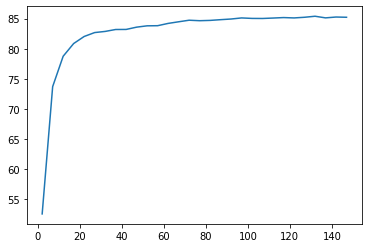

In [12]:
coordinates = np.array(coordinates)
print(coordinates.shape[0])
x,y = np.hsplit(coordinates, 2)
plt.plot(x, y)
plt.show()

### Polynomial kernal svm on PCA+LDA reduced dimension from 2 to 8 degree

1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  82.89
1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  83.37
1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  82.21
1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  81.86
1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  80.26
1.0000000000000002
(60000, 9)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  79.74
6


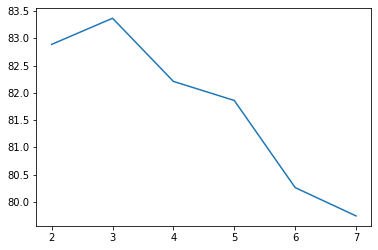

In [21]:
values = []
for k in range (2,8):
    acc = cvt_to_pca_lda_svm_kernal_acc(100, 'poly', k, X_train, X_test, Y_train.ravel(), Y_test.ravel())
    values.append([k,acc])

coordinates = np.array(values)
print(coordinates.shape[0])
x,y = np.hsplit(coordinates, 2)
plt.plot(x, y)
plt.show()

### Polynomial kernal svm on only PCA reduced dimension from 2 to 8 degree

0.9118828391264147
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  86.41
0.9118356885502169
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  85.31
0.9119084579687303
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  80.53
0.9118862124173481
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  74.91
0.9118740906583084
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  69.24
0.9118815771511788
(60000, 100)


E:\Anaconda\envs\sbdeeplearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy is-  64.47
6


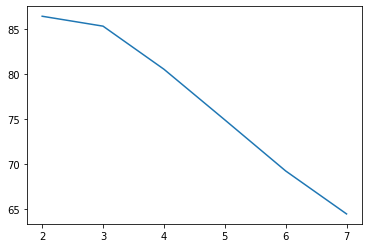

In [23]:
values = []
for k in range (2,8):
    acc = cvt_to_pca_svm_kernal_acc(100, 'poly', k, X_train, X_test, Y_train.ravel(), Y_test.ravel())
    values.append([k,acc])

coordinates = np.array(values)
print(coordinates.shape[0])
x,y = np.hsplit(coordinates, 2)
plt.plot(x, y)
plt.show()